# Example: Modeling the Premium, Payout, and Profit of Long and Short American-style Put Contracts
This example will familiarize students with calculating the premium, profit, and breakeven for [American-style](https://en.wikipedia.org/wiki/Option_style) `put` contracts. In particular, we'll compare the calculated and observed properties of an American-style `put` contract on [Micron Technologies](https://finance.yahoo.com/quote/MU/), ticker symbol `MU.`

### Learning objectives
* __Objective 1__: Compute the premium of the `MU put` contract using the [Cox, Ross, and Rubinstein (CRR) model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model), a specific Binomial lattice model implementation.
    * `Check`: Is the computed `MU` put option premium `similar` to the observed market value?
* __Objective 2__: Compare the premium of American- and European-style `put` contracts for our example `MU` contract
    * `Check`: Is the American option premium greater than or equal to the equivalent European option premium?
* __Objective 3__: Compute the payoff, profit, and breakeven points for the example `MU put` contract at expiration

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* See the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) for additional information on functions and types used in this material. 

In [1]:
include("Include.jl")

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
    Updating `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-3/Project.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
    Updating `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-3/Manifest.toml`
  [d3d80556] + LineSearches v7.2.0
  [429524aa] + Optim v1.9.2
  [d96e819e] + Parameters v0.12.3
  [85a6dd25] + PositiveFactorizations v0.2.4
  [3a884ed6] + UnPack v1.0.2
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
Precompiling project...
  ✓ EpollShim_jll
  ✓ mtdev_jll
  ✓ Formatting

MyOptionsChainDataSet (generic function with 1 method)

## Prerequisites
Create a perturbation vector $\beta_{i}\in\beta$ which holds values $\beta_{i}\in\left[0.8.1.2\right]$. We'll use these values to perturb or compute various things, e.g., possible share prices at expiration for `MU`:

In [2]:
β = range(0.8,stop=1.2,length=1001) |> collect;

## Objective 1: Compute the Premium of an American `put` contract using a Binomial lattice
Consider a `put` option with a strike price `K = 75 USD/share` on [Micron Technologies](https://finance.yahoo.com/quote/MU/) (ticker symbol `MU`) with `T = 62 days` to expiration and an implied volatility `IV = 0.4005`. The current share price of `MU` is $S_{o}$ = `79.50 USD/share`, and the risk-free-rate is `4.9%`.
* To start the premium calculation, set the parameters for this contract and then build an instance of the `MyAdjacencyBasedCRREquityPriceTree` type, an instance of the `MyAmericanPutContractModel` type, and then use the `premium(...)` function to compute the premium (price) of the contract. The market bid and ask price for this option are $\mathcal{P}_{p}$ = `2.90 USD/share` to $\mathcal{P}_{p}$ = `2.96 USD/share`.

In [3]:
r̄ = 0.049; # risk free rate
Δt = (1/365); # step-size, assuming 365-trading days per year
T = 62*Δt; # duration of the contract (units: years)
IV = 0.4005; # implied volatility
Sₒ = 79.50; # share price at contract purchase (units: USD/share)
K = 75.0; # strike price for the MU contract (units: USD/share)
h = 248; # number of levels in the binomial tree

Build an instance of the `MyAdjacencyBasedCRREquityPriceTree` type, which holds the parameters and data for the binomial price tree using the `build(...)` function. We pass the empty tree to the `populate(...)` method, which fills in the data in the tree. We store this in the `treemodel` variable:

In [4]:
treemodel = build(MyAdjacencyBasedCRREquityPriceTree, 
    (μ = r̄, T = T, σ = IV)) |> (x-> populate(x, Sₒ = Sₒ, h = h));

Now, create an instance of the `MyAmericanPutContractModel` type, which holds the data for the contract information using the `build(...)` method. We store this instance in the `test_american_put_contract_model` variable:

In [5]:
test_american_put_contract_model = build(MyAmericanPutContractModel, (
        K = K, sense = 1, copy = 1));

Finally, we compute the premium for this `put` contract by passing the `treemodel` instance (which holds the risk-neutral simulation of the share price) and the `test_american_put_contract_model` instance (holds contact information) to the `premium(...)` function:

In [6]:
computed_option_price = premium(test_american_put_contract_model, treemodel)
println("The CRR premium for the American MU put contract is: $(computed_option_price) USD/share")

The CRR premium for the American MU put contract is: 2.932 USD/share


### Check: Is the computed `MU` premium close to the observed market value?
Let's use the [isapprox function](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) combined with the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check the similarity of the computed, and observed option price. 
* If the price values are different beyond `rtol = 1e-2`, a `false` result is generated, and an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError) is thrown

In [7]:
observed_option_price = 2.96;
@assert isapprox(observed_option_price, computed_option_price; rtol = 1e-2)

## Objective 2: Comparison of American and European `put` contract premiums
The difference between [American-](https://en.wikipedia.org/wiki/Option_style) and [European-style](https://en.wikipedia.org/wiki/Option_style) options contracts is when exercise is permitted. However, while this may seem to be only a slight difference, it could lead to differences in the contract premium.
* `Hypothesis`: From the seller's perspective, [American-style](https://en.wikipedia.org/wiki/Option_style) contracts may have increased `exercise` risk. Thus, they have _at least_ the same premium, if not greater, than their equivalent [European-style](https://en.wikipedia.org/wiki/Option_style) contract.

Test the `hypothesis` by comparing the premiums of American and equivalent European-style `MU put` contracts by building a `MyEuropeanPutContractModel` instance with the `MU` contract parameters and setting this to the `test_european_put_contract_model` variable:

In [8]:
test_european_put_contract_model = build(MyEuropeanPutContractModel, (
            K = K, IV = IV, DTE = T, sense = 1, copy = 1));

Then, create a `MyBlackScholesContractPricingModel` instance that we'll use to compute the premium for this contract:

In [9]:
bsm_model = build(MyBlackScholesContractPricingModel, (Sₒ = Sₒ, r = r̄));

Finally, call the `premium(...)` function using the `bsm_model` pricing model and `test_european_call_contract_model` contract model, and store the respective premium value in the `compute_premium_european` variable:

In [10]:
compute_premium_european = premium(test_european_put_contract_model, bsm_model)
println("The BSM premium for a European MU put contract is: $(compute_premium_european) USD/share")

The BSM premium for a European MU put contract is: 2.905 USD/share


### Check: Is the American option premium greater than or equal to the European option premium?
Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check if the American style option premium is greater than or equal to the equivalent European option. If the American premium value is less than the European equivalent, a `false` result is generated, and an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError) is thrown:

In [11]:
@assert computed_option_price ≥ compute_premium_european

## Objective 3: Compute the payoff, profit, and breakeven points for the example `MU put` contract at expiration

### TODO: Compute the Payoff array for the `MU put` contract
The profit for a `long put` contract is the contract's payoff minus the premium paid for the contract. On the other hand, the breakeven is the share price at expiration where the `profit = 0`.
* Create an array holding possible share prices at expiration by perturbing the initial share price by the $\beta$ variable. Store these values in the `share_price_array` variable.

In [12]:
share_price_array = Array{Float64,1}();
for i ∈ eachindex(β)
    βᵢ = β[i]; # get perturbation value
    push!(share_price_array, βᵢ*Sₒ); # compute the perturbed price, and store 
end

Compute the payoff and profit arrays using the `share_price_array` and the `payoff(...)` function. Save the payoff array in the `V_call` variable.
* The `payoff(...)` function takes a contract array $\mathcal{C}$, and the share prices $S(T)$ as a $\dim S(T)\times{1}$ vector, and returns a $\dim S(T)\times{3}$ array in the case of single contract. The first column is the share price, and the second is the contract's payoff.
* In cases with multiple contracts, the last column is the net payoff across all contracts. In this case, because $\dim\mathcal{C} = 1$, columns two and three are equal.

In [13]:
 V_put = payoff([test_american_put_contract_model], share_price_array);

### TODO: Compute the Profit array for a `put` contract
Finally, given the payoff array for the `call` contract stored in the `V_put` variable, we can compute the profit and breakeven point by subtracting the premium $\mathcal{P}_{p}$ paid for the contract. Store this value in the `profit_array_put` variable.

In [14]:
𝒫_put = computed_option_price; # USD/share specified in the problem
profit_array_put = V_put[:,3] .- 𝒫_put;

`Unhide` the code block below to see how to plot the payoff and profit of this `put` option at expiration as a function of the `share_price_array`. The breakeven share price at expiration occurs at the intersection of the profit line (red) and the breakeven line (black):

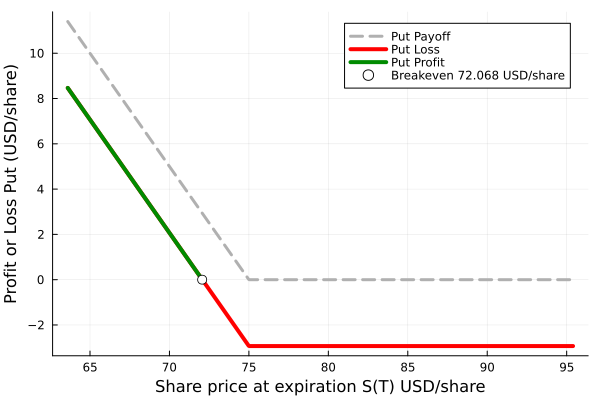

In [21]:
plot(V_put[:,1],  V_put[:,3], label="Put Payoff", lw=3, c=:gray69, ls=:dash)
plot!(V_put[:,1], profit_array_put, label="Put Loss", lw=4, c=:red)

# find all values where profit >= 0.0
idx_profit = findall(x-> x ≥ 0.0, profit_array_put);
breakeven_point = K - computed_option_price;
plot!(V_put[idx_profit,1], profit_array_put[idx_profit], label="Put Profit ", lw=4, c=:green4)
scatter!([V_put[idx_profit[end],1]],[0], label="Breakeven $(breakeven_point) USD/share", 
    c=:black, ms=5, mc=:white)
xlabel!("Share price at expiration S(T) USD/share", fontsize=18)
ylabel!("Profit or Loss Put (USD/share)", fontsize=18)
# savefig("Fig-Example-Call-K80-62DTE.pdf")

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.